In [2]:
import numpy as np
import networkx as nx
import random
from sg_embedding import *
from matplotlib import pyplot as plt

In [2]:
def matrices_to_graphs(matrix_list):
    """
    Takes a list of adjacency matrices as an input and generates a list of graphs.
    """
    g_list = []
    for matrix in matrix_list:
        array = np.array(matrix)
        g = nx.convert_matrix.from_numpy_array(array)
        g_list.append(g)

    return g_list

In [3]:
def distance(v_1, v_2):
    '''
    This function calculates the Euclidean distance between two (graph) embedded vectors.
    '''
    
    diffs_1 = []
    diffs_2 = []
    
    for i in range(len(v_1)):
        
        diffs_1.append(v_1[i] - v_2[i])
        diffs_2.append(v_1[i] + v_2[i])
    
    return min(np.linalg.norm(diffs_1), np.linalg.norm(diffs_2))

In [5]:
graphs_file = open("600_22_node_weighted_random_graphs.txt")
matrix_list = np.loadtxt(graphs_file).reshape(600, 22, 22)
g_list = matrices_to_graphs(matrix_list)

In [13]:
test_graph = g_list[10].copy()

In [7]:
gamma_params_file = open('22_node_weighted_random_graphs_gammas.txt')
gamma_params = np.loadtxt(gamma_params_file).reshape(600, 3)

beta_params_file = open('22_node_weighted_random_graphs_betas.txt')
beta_params = np.loadtxt(beta_params_file).reshape(600, 3)

In [9]:
weighted_spectral = SGEmbedding(embedding_dimension=1)

In [10]:
embedding_model = []
for i in range(len(g_list)):
    embedding_model.append((weighted_spectral.fit(g_list[i])).embedding_)

In [11]:
def find_min_index(vector):
    
    length = len(vector)
    sorted_vector = sorted(vector)

    min_value = sorted_vector[0]

    for i in range(len(vector)):
        if vector[i] == min_value:
            min_index = vector.index(vector[i])

    return min_index

In [14]:
test_graph_vector = (weighted_spectral.fit(test_graph)).embedding_

In [18]:
dists = []
for i in range(len(embedding_model)):
    dist = distance(embedding_model[i], test_graph_vector)
    dists.append(dist)
index = find_min_index(dists)

gammas = gamma_params[index]
betas = beta_params[index]

print(index, '\n', gammas, '\n', betas)

10 
 [ 4.06176297  0.00806593 -1.72331479] 
 [-2.4398505   2.61085001  2.76127815]


In [19]:
indices = []
for i in range(len(test_g_list)):
    test_graph_vector = (weighted_spectral.fit(test_g_list[i])).embedding_
    eucl_dists = []
    for j in range(len(embedding_model)):
        eucl_dist = distance(embedding_model[j], test_graph_vector)
        eucl_dists.append(eucl_dist)
    index = find_min_index(eucl_dists)
    indices.append(index)

In [ ]:
### Anything after here, you can ignore.

In [22]:
def remove_edge(graph):

    np.random.seed(42)
    removed_graph = graph.copy()
    edges = []
    for i, edge in enumerate(graph.edges()):
        edges.append(edge)
    removed_edge = random.choice(edges)
    removed_graph.remove_edge(removed_edge[0], removed_edge[1])
    new_graph = removed_graph.copy()

    return new_graph

In [23]:
def change_weight(graph):

    change_fraction = 0.1
    edges = []
    for i, edge in enumerate(graph.edges()):
        edges.append(edge)

    np.random.seed(42)
    changed_edge = random.choice(edges)
    old_weight = graph.get_edge_data(changed_edge[0], changed_edge[1]).get('weight')
    new_weight = old_weight + change_fraction * old_weight

    graph[changed_edge[0]][changed_edge[1]]['weight'] = new_weight
    new_graph = graph.copy()
#     print(f'changed {changed_edge} edge weight from {old_weight} to {new_weight}')

    return new_graph

In [24]:
def compare_edge(g_1, g_2):

    # g_r = remove_edge(g_2)
    v_r = weighted_spectral.fit(g_2).embedding_
    v_1 = weighted_spectral.fit(g_1).embedding_

    v_diff = []
    v_diff_2 = []
    v_diff_3 = []
    for i in range(len(v_r)):
        v_diff.append(np.abs(v_1[i]) - np.abs(v_r[i]))
        v_diff_2.append(v_1[i] - v_r[i])
        v_diff_3.append(v_1[i] + v_r[i])
        # v_diff.append(v_r[i] - v_1[i])

    return np.linalg.norm(v_diff), np.linalg.norm(v_diff_2), np.linalg.norm(v_diff_3)

In [25]:
def compare_weight(g_1, g_2):

    g_w = g_2.copy()
    g_w = change_weight(g_w)
    v_w = weighted_spectral.fit(g_w).embedding_
    v_1 = weighted_spectral.fit(g_1).embedding_

    v_diff = []
    v_diff_2 = []
    v_diff_3 = []
    for i in range(len(v_w)):
        v_diff.append(np.abs(v_1[i]) - np.abs(v_w[i]))
        v_diff_2.append(v_1[i] - v_w[i])
        v_diff_3.append(v_1[i] + v_w[i])
        # v_diff.append(v_w[i] - v_1[i])

    return np.linalg.norm(v_diff), np.linalg.norm(v_diff_2), np.linalg.norm(v_diff_3)

In [57]:
diffs = []
for i in range(len(g_list)):
    g_removed = remove_edge(g_list[i])
    if nx.is_connected(g_removed):
        v_1 = weighted_spectral.fit(g_list[i]).embedding_
        v_2 = weighted_spectral.fit(g_removed).embedding_
        v_res = []
        for j in range(len(v_1)):
            v_res.append(np.abs(v_1[j]) - np.abs(v_2[j]))
        diffs.append(np.linalg.norm(v_res))
    break

[Text(0.5, 0, 'graph index'), Text(0, 0.5, 'min(|v1 + v2|, |v1 - v2|)')]

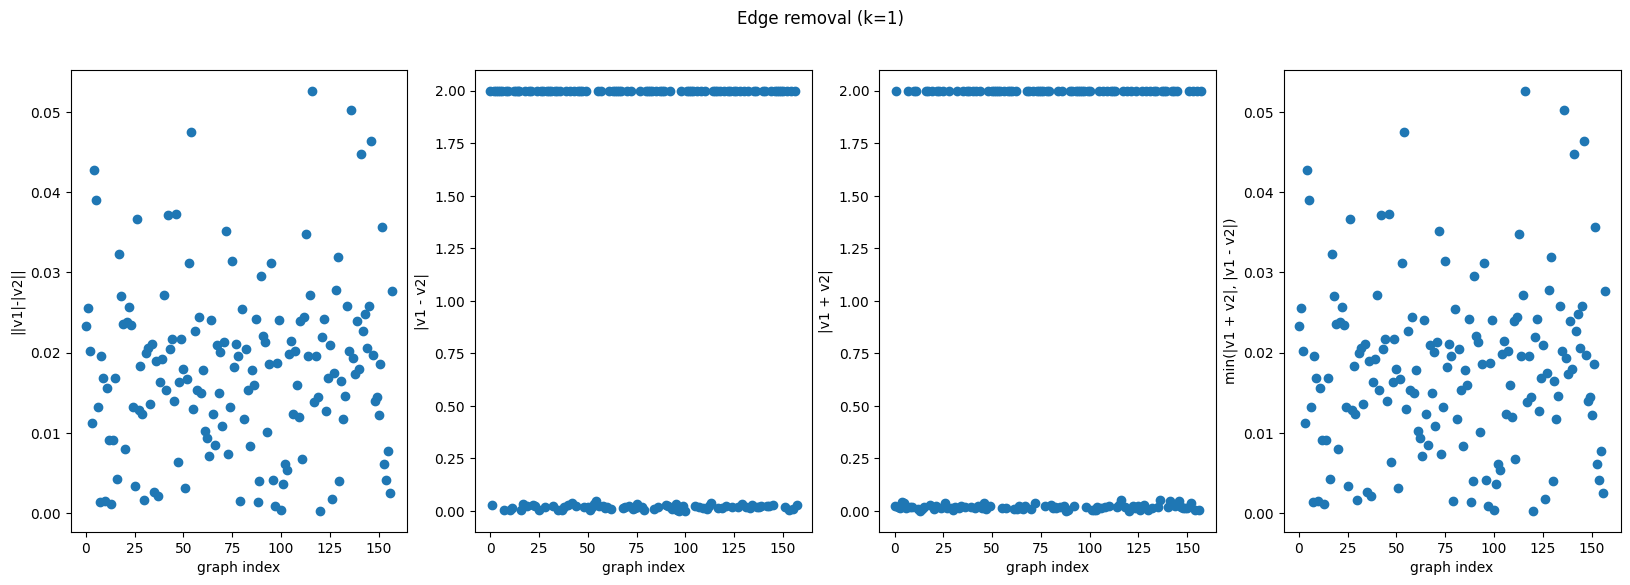

In [28]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))
diffs = []
diffs_2 = []
diffs_3 = []
diffs_4 = []
for i in range(len(g_list)):
    g_test = remove_edge(g_list[i])
    if nx.is_connected(g_test):
        diff, diff_2, diff_3 = compare_edge(g_list[i], g_test)
        diffs.append(diff)
        diffs_2.append(diff_2)
        diffs_3.append(diff_3)
        diffs_4.append(min(diff_2, diff_3))
n_graphs = np.arange(0, len(diffs), 1)
fig.suptitle('Edge removal (k=1)')
ax1.scatter(n_graphs, diffs)
ax1.set(xlabel='graph index', ylabel='||v1|-|v2||')
ax2.scatter(n_graphs, diffs_2)
ax2.set(xlabel='graph index', ylabel='|v1 - v2|')
ax3.scatter(n_graphs, diffs_3)
ax3.set(xlabel='graph index', ylabel='|v1 + v2|')
ax4.scatter(n_graphs, diffs_4)
ax4.set(xlabel='graph index', ylabel='min(|v1 + v2|, |v1 - v2|)')
# plt.savefig('edge_removal.png')

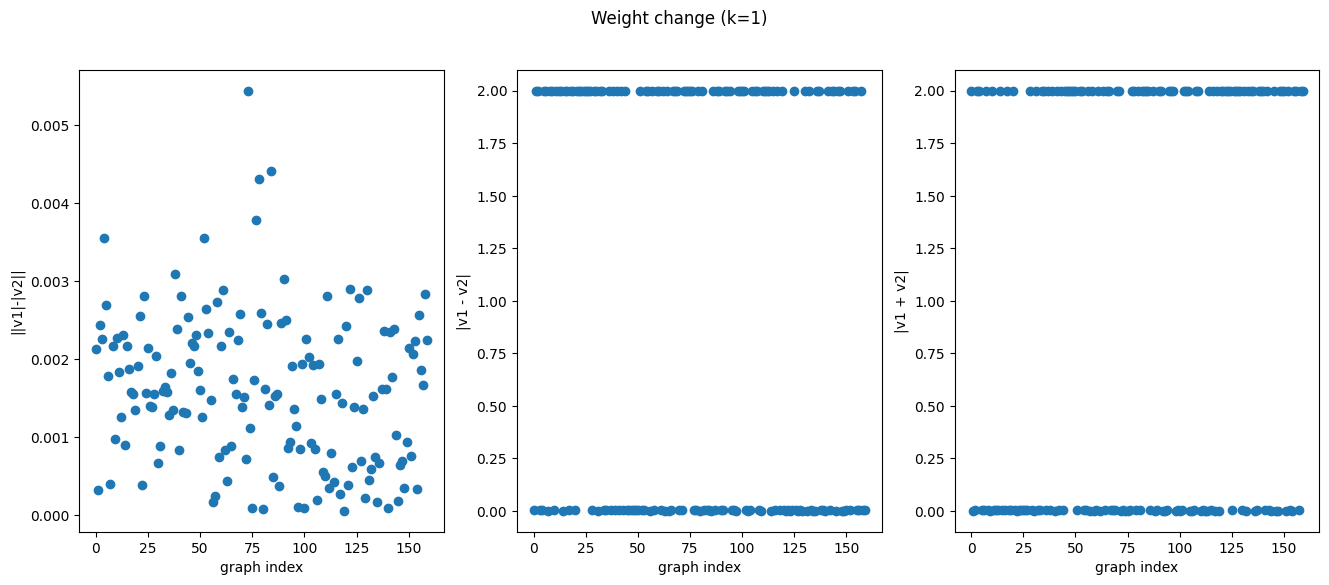

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
diffs = []
diffs_2 = []
diffs_3 = []
for i in range(len(g_list)):
    diff, diff_2, diff_3 = compare_weight(g_list[i], g_list[i])
    diffs.append(diff)
    diffs_2.append(diff_2)
    diffs_3.append(diff_3)
n_graphs = np.arange(0, len(diffs), 1)
fig.suptitle('Weight change (k=1)')
ax1.scatter(n_graphs, diffs)
ax1.set(xlabel='graph index', ylabel='||v1|-|v2||')
ax2.scatter(n_graphs, diffs_2)
ax2.set(xlabel='graph index', ylabel='|v1 - v2|')
ax3.scatter(n_graphs, diffs_3)
ax3.set(xlabel='graph index', ylabel='|v1 + v2|')
plt.savefig('weight_change.png')

[Text(0.5, 0, 'graph index'), Text(0, 0.5, '|v1 + v2|')]

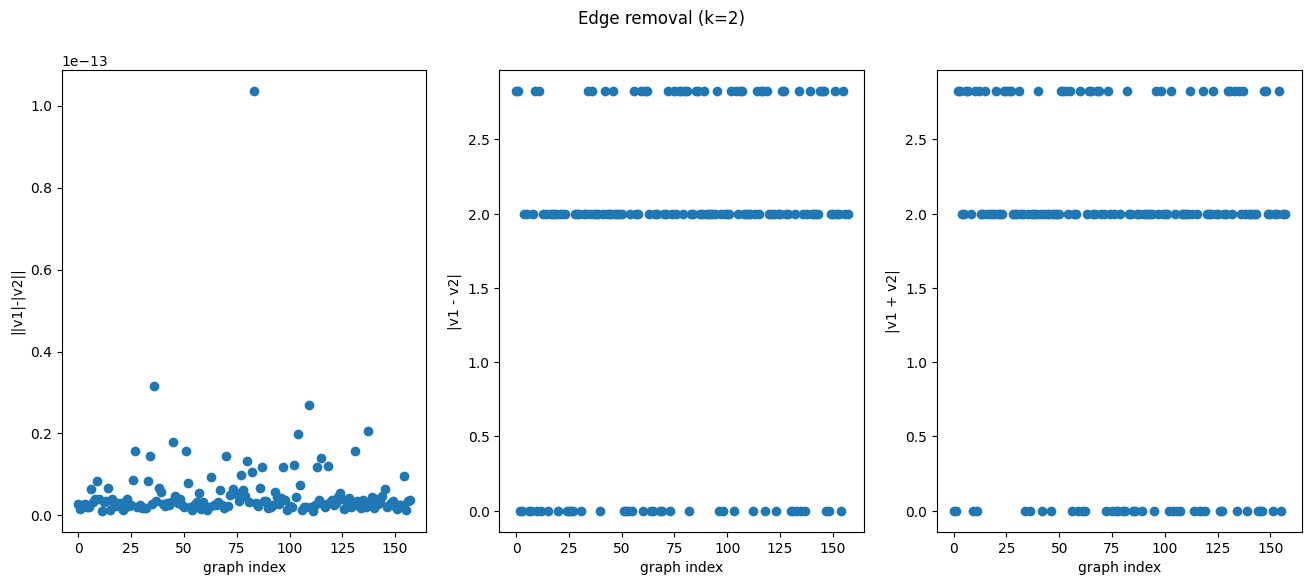

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
diffs = []
diffs_2 = []
diffs_3 = []
for g in g_list:
    g_test = g.copy()
    if nx.is_connected(remove_edge(g_test)):
        diff, diff_2, diff_3 = compare_edge(g, g_test)
        diffs.append(diff)
        diffs_2.append(diff_2)
        diffs_3.append(diff_3)
n_graphs = np.arange(0, len(diffs), 1)
fig.suptitle('Edge removal (k=2)')
ax1.scatter(n_graphs, diffs)
ax1.set(xlabel='graph index', ylabel='||v1|-|v2||')
ax2.scatter(n_graphs, diffs_2)
ax2.set(xlabel='graph index', ylabel='|v1 - v2|')
ax3.scatter(n_graphs, diffs_3)
ax3.set(xlabel='graph index', ylabel='|v1 + v2|')

[Text(0.5, 0, 'graph index'), Text(0, 0.5, '|v1 + v2|')]

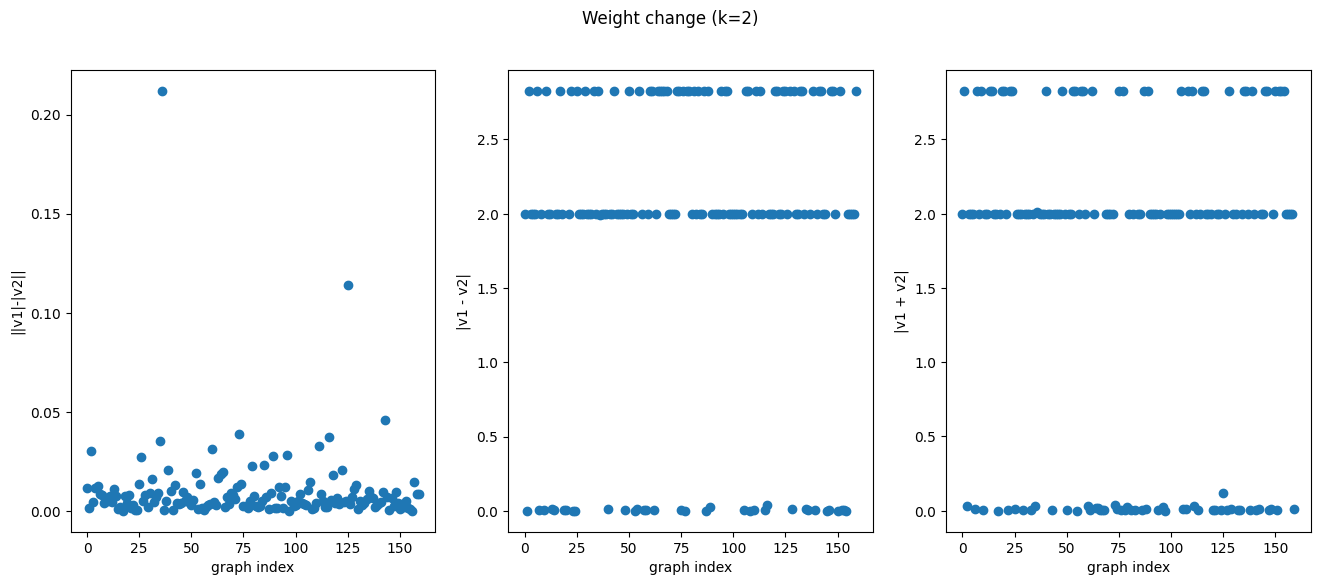

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
diffs = []
diffs_2 = []
diffs_3 = []
for g in g_list:
    diff, diff_2, diff_3 = compare_weight(g, g)
    diffs.append(diff)
    diffs_2.append(diff_2)
    diffs_3.append(diff_3)
n_graphs = np.arange(0, len(diffs), 1)
fig.suptitle('Weight change (k=2)')
ax1.scatter(n_graphs, diffs)
ax1.set(xlabel='graph index', ylabel='||v1|-|v2||')
ax2.scatter(n_graphs, diffs_2)
ax2.set(xlabel='graph index', ylabel='|v1 - v2|')
ax3.scatter(n_graphs, diffs_3)
ax3.set(xlabel='graph index', ylabel='|v1 + v2|')

[Text(0.5, 0, 'graph index'), Text(0, 0.5, 'euclidean distance')]

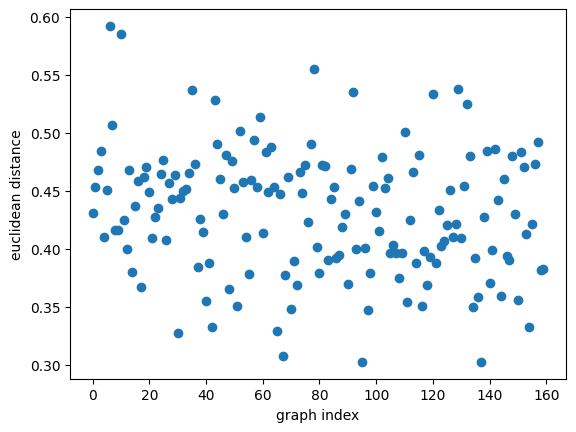

In [29]:
fig, ax = plt.subplots()
dists = []
for i in range(len(g_list)):
    v1 = weighted_spectral.fit(g_list[i]).embedding_
    random_index = np.arange(0, len(g_list), 1)
    index = random.choice(random_index)
    v2 = weighted_spectral.fit(g_list[index]).embedding_
    dists.append(distance(v1, v2))
n_graphs = np.arange(0, len(dists), 1)
ax.scatter(n_graphs, dists)
ax.set(xlabel='graph index', ylabel='euclidean distance')

[Text(0.5, 0, 'graph index'), Text(0, 0.5, 'euclidean distance')]

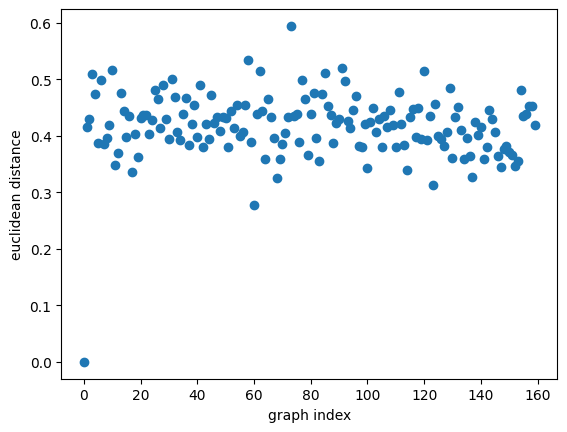

In [30]:
fig, ax = plt.subplots()
dists = []
v1 = weighted_spectral.fit(g_list[0]).embedding_
for g in g_list:    
    v2 = weighted_spectral.fit(g).embedding_
    dists.append(distance(v1, v2))
n_graphs = np.arange(0, len(dists), 1)
ax.scatter(n_graphs, dists)
ax.set(xlabel='graph index', ylabel='euclidean distance')